In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt    
%matplotlib inline

In [68]:
matches_df = pd.read_csv('matches.csv')
matches_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [69]:
deliveries_df = pd.read_csv('deliveries.csv')
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [70]:
deliveries_df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [71]:
deliveries_df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

### Remove Super Over Innings 

In [72]:
deliveries_df['inning'].value_counts()

inning
1    135018
2    125741
3        77
4        72
5         8
6         4
Name: count, dtype: int64

In [73]:
filtered_matches_df = deliveries_df[deliveries_df['inning'].isin([1, 2])]
filtered_matches_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [74]:
filtered_matches_df['inning'].value_counts()

inning
1    135018
2    125741
Name: count, dtype: int64

### Creating Batting Records Dataset 

In [75]:
batting_stats = filtered_matches_df.groupby('batter').agg(total_runs=('batsman_runs', 'sum'),
                                                          total_innings=('match_id', 'nunique'),
                                                         total_balls=('ball', 'count')).reset_index()
batting_stats.rename(columns={'batter': 'player_name'}, inplace=True)
batting_stats= batting_stats.sort_values(by='total_runs',ascending = False).reset_index()
batting_stats

,index,player_name,total_runs,total_innings,total_balls
0,631,V Kohli,8004,244,6232
1,512,S Dhawan,6769,221,5481
2,477,RG Sharma,6628,251,5180
3,147,DA Warner,6565,184,4844
4,546,SK Raina,5528,200,4174
...,...,...,...,...,...
668,517,S Ladda,0,2,10
669,518,S Lamichhane,0,1,1
670,69,Abdur Razzak,0,1,2
671,565,SS Cottrell,0,1,2


In [76]:
batting_stats['average']= batting_stats['total_runs']/batting_stats['total_innings']
batting_stats['strike rate'] = (batting_stats['total_runs']/batting_stats['total_balls'])*100
batting_stats.head()

,index,player_name,total_runs,total_innings,total_balls,average,strike rate
0,631,V Kohli,8004,244,6232,32.803279,128.433890
1,512,S Dhawan,6769,221,5481,30.628959,123.499361
2,477,RG Sharma,6628,251,5180,26.406375,127.953668
3,147,DA Warner,6565,184,4844,35.679348,135.528489
4,546,SK Raina,5528,200,4174,27.640000,132.438908


In [77]:
batting_stats = batting_stats.drop(columns=['total_balls','index'])

In [78]:
batting_stats

,player_name,total_runs,total_innings,average,strike rate
0,V Kohli,8004,244,32.803279,128.433890
1,S Dhawan,6769,221,30.628959,123.499361
2,RG Sharma,6628,251,26.406375,127.953668
3,DA Warner,6565,184,35.679348,135.528489
4,SK Raina,5528,200,27.640000,132.438908
...,...,...,...,...,...
668,S Ladda,0,2,0.000000,0.000000
669,S Lamichhane,0,1,0.000000,0.000000
670,Abdur Razzak,0,1,0.000000,0.000000
671,SS Cottrell,0,1,0.000000,0.000000


### Creating a Bowling Records Dataset

In [79]:
filtered_matches_df['dismissal_kind'].value_counts()

dismissal_kind
caught                   8053
bowled                   2204
run out                  1107
lbw                       798
caught and bowled         367
stumped                   358
retired hurt               15
hit wicket                 15
obstructing the field       3
retired out                 3
Name: count, dtype: int64

In [80]:
filtered_matches_df['runs_off_the_bat'] = filtered_matches_df['total_runs'] - filtered_matches_df['extra_runs']
filtered_matches_df.head()

C:\Users\range\AppData\Local\Temp\ipykernel_23612\3951571750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_matches_df['runs_off_the_bat'] = filtered_matches_df['total_runs'] - filtered_matches_df['extra_runs']


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,runs_off_the_bat
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN,0
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,0
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN,0
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,0
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,0


In [81]:
bowler_dismissals = ['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped', 'hit wicket']
valid_wickets_df = filtered_matches_df[(filtered_matches_df['is_wicket'] == 1) & 
                                       (filtered_matches_df['dismissal_kind'].isin(bowler_dismissals))]

In [82]:
bowler_wickets = valid_wickets_df.groupby('bowler').size().reset_index(name='total_wickets')

In [83]:
bowler_balls_matches = filtered_matches_df.groupby('bowler').agg(
    total_balls=('ball', 'count'),
    total_runs_given =('runs_off_the_bat','sum'),
    total_matches=('match_id', 'nunique')
).reset_index()

In [84]:
bowler_stats = bowler_wickets.merge(bowler_balls_matches, on='bowler')
bowler_stats.rename(columns={'bowler': 'player_name'}, inplace=True)
bowler_stats = bowler_stats.sort_values(by = 'total_wickets', ascending= False).reset_index()
bowler_stats = bowler_stats.drop(columns = ['index'])
bowler_stats['economy'] = (bowler_stats['total_runs_given'] / (bowler_stats['total_balls'] / 6)).round(2)
bowler_stats

,player_name,total_wickets,total_balls,total_runs_given,total_matches,economy
0,YS Chahal,205,3628,4478,159,7.41
1,PP Chawla,192,3895,5027,191,7.74
2,DJ Bravo,183,3296,4178,158,7.61
3,B Kumar,181,4060,4744,176,7.01
4,SP Narine,180,4140,4481,175,6.49
...,...,...,...,...,...,...
446,SSB Magala,1,37,50,2,8.11
447,SS Sarkar,1,25,34,2,8.16
448,SS Mundhe,1,7,5,1,4.29
449,SS Agarwal,1,24,42,1,10.50


### Top 20 Highest Run Scorers of The IPL

In [85]:
batting_stats.head(20)

,player_name,total_runs,total_innings,average,strike rate
0,V Kohli,8004,244,32.803279,128.433890
1,S Dhawan,6769,221,30.628959,123.499361
2,RG Sharma,6628,251,26.406375,127.953668
3,DA Warner,6565,184,35.679348,135.528489
4,SK Raina,5528,200,27.640000,132.438908
5,MS Dhoni,5243,228,22.995614,132.835065
6,AB de Villiers,5162,170,30.364706,148.375970
7,CH Gayle,4965,141,35.212766,141.776128
8,RV Uthappa,4952,197,25.137056,126.165605
9,KD Karthik,4842,233,20.781116,131.433225


### Top 20 Highest Wicket Takers in IPL

In [86]:
bowler_stats.head(20)

,player_name,total_wickets,total_balls,total_runs_given,total_matches,economy
0,YS Chahal,205,3628,4478,159,7.41
1,PP Chawla,192,3895,5027,191,7.74
2,DJ Bravo,183,3296,4178,158,7.61
3,B Kumar,181,4060,4744,176,7.01
4,SP Narine,180,4140,4481,175,6.49
5,R Ashwin,180,4679,5178,208,6.64
6,A Mishra,174,3444,4065,162,7.08
7,SL Malinga,170,2974,3194,122,6.44
8,JJ Bumrah,165,3161,3587,133,6.81
9,RA Jadeja,160,3895,4777,211,7.36


### Let's find Top All Rounders of the IPL

In [87]:
All_rounders = batting_stats.merge(bowler_stats, on = 'player_name')
All_rounders

,player_name,total_runs,total_innings,average,strike rate,total_wickets,total_balls,total_runs_given,total_matches,economy
0,V Kohli,8004,244,32.803279,128.433890,4,264,354,26,8.05
1,S Dhawan,6769,221,30.628959,123.499361,4,49,65,6,7.96
2,RG Sharma,6628,251,26.406375,127.953668,15,349,438,32,7.53
3,SK Raina,5528,200,27.640000,132.438908,25,930,1096,69,7.07
4,CH Gayle,4965,141,35.212766,141.776128,18,584,680,38,6.99
...,...,...,...,...,...,...,...,...,...,...
406,S Kaushik,0,1,0.000000,0.000000,6,210,291,10,8.31
407,S Ladda,0,2,0.000000,0.000000,5,141,221,9,9.40
408,S Lamichhane,0,1,0.000000,0.000000,13,211,291,9,8.27
409,SS Cottrell,0,1,0.000000,0.000000,6,131,161,6,7.37


In [88]:
Top_All_rounders = All_rounders[(All_rounders['total_runs']>=1000) & (All_rounders['total_wickets']>=100)].reset_index()
Top_All_rounders = Top_All_rounders.drop(columns=['index'])

In [89]:
Top_All_rounders

,player_name,total_runs,total_innings,average,strike rate,total_wickets,total_balls,total_runs_given,total_matches,economy
0,RA Jadeja,2959,180,16.438889,124.432296,160,3895,4777,211,7.36
1,AD Russell,2484,104,23.884615,164.285714,115,1771,2561,112,8.68
2,AR Patel,1653,112,14.758929,125.417299,123,3146,3701,148,7.06
3,DJ Bravo,1560,110,14.181818,125.100241,183,3296,4178,158,7.61
4,SP Narine,1534,106,14.471698,155.894309,180,4140,4481,175,6.49


### How To Design ALL Time IPL XI

####  1. Opener
####  2. Opener 
####  3. M.O Batsman
####  4. M.O Batsman
####  5. M.O Batsman
####  6. Batting All Rounder
####  7. Bowling All Rounder
####  8. Bowling All Rounder
####  9. Bowler
#### 10. Bowler
#### 11. Bowler

#### Note: Only 4 Foreigners can be selected

## Let's Select Our Openers

### Creating PowerPlay Datset of Batsmen

In [90]:
filtered_matches_df['over'].value_counts()

over
1     13773
0     13745
2     13597
3     13575
4     13560
5     13494
6     13452
7     13430
8     13396
9     13354
10    13289
11    13261
12    13222
13    13124
14    13024
15    12879
16    12685
17    12318
18    11583
19     9998
Name: count, dtype: int64

In [91]:
pp_overs = [0,1,2,3,4,5]
pp_df = filtered_matches_df[filtered_matches_df['over'].isin(pp_overs)]
pp_df['over'].value_counts()

over
1    13773
0    13745
2    13597
3    13575
4    13560
5    13494
Name: count, dtype: int64

In [92]:
PP_batting_stats = pp_df.groupby('batter').agg(total_runs=('batsman_runs', 'sum'),
                                                          total_innings=('match_id', 'nunique'),
                                                         total_balls=('ball', 'count')).reset_index()
PP_batting_stats.rename(columns={'batter': 'player_name'}, inplace=True)
PP_batting_stats['average']= PP_batting_stats['total_runs']/PP_batting_stats['total_innings']
PP_batting_stats['strike rate'] = (PP_batting_stats['total_runs']/PP_batting_stats['total_balls'])*100
PP_batting_stats= PP_batting_stats.sort_values(by='total_runs',ascending = False).reset_index()

#### Let's See Top Run Scorers in PP 

In [93]:
PP_batting_stats.head(10)

,index,player_name,total_runs,total_innings,total_balls,average,strike rate
0,270,S Dhawan,3415,214,2860,15.957944,119.405594
1,74,DA Warner,3316,175,2496,18.948571,132.852564
2,335,V Kohli,2799,193,2343,14.502591,119.462228
3,65,CH Gayle,2373,135,1837,17.577778,129.178008
4,30,AM Rahane,2319,157,2013,14.770701,115.201192
5,101,G Gambhir,2277,147,1945,15.489796,117.069409
6,99,F du Plessis,2148,122,1597,17.606557,134.502192
7,252,RG Sharma,2135,168,1797,12.708333,118.809126
8,264,RV Uthappa,2035,149,1695,13.657718,120.058997
9,148,KL Rahul,2004,110,1634,18.218182,122.643819


#### Let's See Batsmen with High Strike Rates in PP and also with 1500+ runs 

In [94]:
PP_batting_stats_sr = PP_batting_stats[PP_batting_stats['total_runs']>=1500]
PP_batting_stats_sr = PP_batting_stats_sr.sort_values(by='strike rate',ascending=False).reset_index()
PP_batting_stats_sr = PP_batting_stats_sr.drop(columns=['index'])
PP_batting_stats_sr = PP_batting_stats_sr.drop(columns=['level_0'])
PP_batting_stats_sr.head(10)

,player_name,total_runs,total_innings,total_balls,average,strike rate
0,V Sehwag,1593,103,1160,15.466019,137.327586
1,JC Buttler,1612,87,1187,18.528736,135.804549
2,F du Plessis,2148,122,1597,17.606557,134.502192
3,DA Warner,3316,175,2496,18.948571,132.852564
4,CH Gayle,2373,135,1837,17.577778,129.178008
5,SK Raina,1552,133,1207,11.669173,128.583264
6,Q de Kock,1840,107,1435,17.196262,128.222997
7,KL Rahul,2004,110,1634,18.218182,122.643819
8,BB McCullum,1555,104,1273,14.951923,122.152396
9,RV Uthappa,2035,149,1695,13.657718,120.058997


#### For 1st Opening Slot i will select an opener who scores well in power play with good sr 
#### So i have selected 2 Options- David Warner and KL Rahul, one is overseas and one is indian
#### Final decision i will take in the end( warner is ahead rn )
#### Warner is the 2nd highest placed foreign batsmen in high pp strike rate list who was also 2nd placed in
#### Top 10 Highest Run Scorers List
#### For KL Rahul he is the second best placed indian in High PP Strike Rate List and was also placed in Top 10 Highest Run Scorers

### For Second Opener i will select that opener who bats well also in middle overs with good SR

#### Creating Middle Overs Batsmen Dataset

In [95]:
mo_overs = [6,7,8,9,10,11,12,13,14]
mo_overs_stats = filtered_matches_df[filtered_matches_df['over'].isin(mo_overs)]
mo_overs_stats['over'].value_counts()

over
6     13452
7     13430
8     13396
9     13354
10    13289
11    13261
12    13222
13    13124
14    13024
Name: count, dtype: int64

In [96]:
mo_batting_stats = mo_overs_stats.groupby('batter').agg(total_runs=('batsman_runs', 'sum'),
                                                          total_innings=('match_id', 'nunique'),
                                                         total_balls=('ball', 'count')).reset_index()
mo_batting_stats= mo_batting_stats.rename(columns={'batter': 'player_name'})
mo_batting_stats['average']= mo_batting_stats['total_runs']/mo_batting_stats['total_innings']
mo_batting_stats['strike rate'] = (mo_batting_stats['total_runs']/mo_batting_stats['total_balls'])*100
mo_batting_stats = mo_batting_stats.sort_values(by='total_runs',ascending = False).reset_index()
mo_batting_stats = mo_batting_stats.drop(columns=['index'])

In [97]:
mo_batting_stats.head(10)

,player_name,total_runs,total_innings,total_balls,average,strike rate
0,V Kohli,3736,171,3065,21.847953,121.892333
1,SK Raina,3077,151,2423,20.377483,126.991333
2,RG Sharma,2980,172,2515,17.325581,118.489066
3,S Dhawan,2686,125,2192,21.488000,122.536496
4,DA Warner,2621,107,1985,24.495327,132.040302
5,AB de Villiers,2572,135,1990,19.051852,129.246231
6,KD Karthik,2542,175,2122,14.525714,119.792648
7,SV Samson,2419,119,1810,20.327731,133.646409
8,AT Rayudu,2392,139,2015,17.208633,118.709677
9,RV Uthappa,2350,130,1887,18.076923,124.536301


#### Here You Can See Virat Kohli is The highest Run Scorer in The Middle overs and he was also present in 
#### Top Run getters in Powerplay list, this indiacates Kohli has the ability to take the innings deep so Virat Kohli 
#### Will be our 2nd Opener

### So Our Openers selection is:
#### 1. David Warner/ KL Rahul
#### 2. Virat Kohli

### Now Let's Select our Middle Overs Batsmen (3rd, 4th position)
#### Criteria will be :
#### 1. Should be in the list of highest run scorers in middle overs
#### 2. Should be in the list of highest strike rate in middle overs 

#### List Of Highest Run Scorers in Middle overs

In [98]:
mo_batting_stats.head(15)

,player_name,total_runs,total_innings,total_balls,average,strike rate
0,V Kohli,3736,171,3065,21.847953,121.892333
1,SK Raina,3077,151,2423,20.377483,126.991333
2,RG Sharma,2980,172,2515,17.325581,118.489066
3,S Dhawan,2686,125,2192,21.488000,122.536496
4,DA Warner,2621,107,1985,24.495327,132.040302
5,AB de Villiers,2572,135,1990,19.051852,129.246231
6,KD Karthik,2542,175,2122,14.525714,119.792648
7,SV Samson,2419,119,1810,20.327731,133.646409
8,AT Rayudu,2392,139,2015,17.208633,118.709677
9,RV Uthappa,2350,130,1887,18.076923,124.536301


In [99]:
mo_batting_stats_good_sr = mo_batting_stats[mo_batting_stats['total_runs']>=1600 ]
mo_batting_stats_good_sr = mo_batting_stats_good_sr.sort_values(by='strike rate',ascending=False).reset_index()
mo_batting_stats_good_sr= mo_batting_stats_good_sr.drop(columns=['index'])

#### List of Highest Strike Rate Players in Middle Overs

In [100]:
mo_batting_stats_good_sr.head(15)

,player_name,total_runs,total_innings,total_balls,average,strike rate
0,SR Watson,2006,95,1349,21.115789,148.702743
1,CH Gayle,2011,76,1361,26.460526,147.759001
2,GJ Maxwell,1740,92,1181,18.913043,147.332769
3,SA Yadav,2041,103,1493,19.815534,136.704622
4,SV Samson,2419,119,1810,20.327731,133.646409
5,RR Pant,1984,96,1491,20.666667,133.065057
6,DA Warner,2621,107,1985,24.495327,132.040302
7,KL Rahul,1927,85,1488,22.670588,129.502688
8,AB de Villiers,2572,135,1990,19.051852,129.246231
9,YK Pathan,1735,109,1346,15.917431,128.900446


### Suresh Raina is The 2nd Highest Run Scorer in the Middle Overs and also has the 11th highest sr in middle overs
### AB De Villers is 6th Highest Run Scorer in the Middle Overs and also has the 9th highest sr in middle overs
### Sanju Samson is 8th Highest Run Scorer in the Middle Overs and also has the 5th highest sr in middle overs
### Robin Uthappa is 10th Highest Run Scorer in the Middle Overs and also has the 13th Highest sr in middle overs
### Surya Kumar Yadav is 12th Highest Run Scorer in the Middle Overs and also has the 4th Highest sr in middle overs

### So my choice for number 3 and Number 4 position is:
### 3. Suresh Raina
### 4. Sanju Samson/AB De Villers (Sanju is ahead rn)

### Now Lets Find Batsman for Number 5 Position
#### Criteria will be:
#### 1. Should be in the list of Highest Run Scorers in Death Overs
#### 2. Should be in the list of Highest SR in Death Overs

### Creating Death Overs Dataset of Batsmen

In [101]:
Death_overs=[15,16,17,18,19]
Death_overs_stats = filtered_matches_df[filtered_matches_df['over'].isin(Death_overs)]
Death_overs_stats['over'].value_counts()

over
15    12879
16    12685
17    12318
18    11583
19     9998
Name: count, dtype: int64

In [102]:
Death_batting_stats = Death_overs_stats.groupby('batter').agg(total_runs=('batsman_runs', 'sum'),
                                                          total_innings=('match_id', 'nunique'),
                                                         total_balls=('ball', 'count')).reset_index()
Death_batting_stats= Death_batting_stats.rename(columns={'batter': 'player_name'})
Death_batting_stats['average']= Death_batting_stats['total_runs']/Death_batting_stats['total_innings']
Death_batting_stats['strike rate'] = (Death_batting_stats['total_runs']/Death_batting_stats['total_balls'])*100
Death_batting_stats = Death_batting_stats.sort_values(by='total_runs',ascending = False).reset_index()
Death_batting_stats = Death_batting_stats.drop(columns=['index'])

#### Highest Run Scorers in Death Overs

In [103]:
Death_batting_stats.head(15)

,player_name,total_runs,total_innings,total_balls,average,strike rate
0,MS Dhoni,3292,184,1958,17.891304,168.130746
1,KA Pollard,2032,128,1270,15.875000,160.000000
2,KD Karthik,1904,130,1151,14.646154,165.421373
3,AB de Villiers,1868,81,867,23.061728,215.455594
4,RA Jadeja,1680,143,1176,11.748252,142.857143
5,RG Sharma,1513,88,868,17.193182,174.308756
6,V Kohli,1469,88,824,16.693182,178.276699
7,AD Russell,1324,69,739,19.188406,179.161028
8,DA Miller,1298,84,768,15.452381,169.010417
9,HH Pandya,1290,89,798,14.494382,161.654135


In [104]:
death_batting_stats_good_sr = Death_batting_stats[Death_batting_stats['total_runs']>=800 ]
death_batting_stats_good_sr = death_batting_stats_good_sr.sort_values(by='strike rate',ascending=False).reset_index()
death_batting_stats_good_sr= death_batting_stats_good_sr.drop(columns=['index'])

#### Highest Strike Rates in Death Overs

In [105]:
death_batting_stats_good_sr.head(15)

,player_name,total_runs,total_innings,total_balls,average,strike rate
0,AB de Villiers,1868,81,867,23.061728,215.455594
1,RR Pant,923,55,480,16.781818,192.291667
2,AD Russell,1324,69,739,19.188406,179.161028
3,V Kohli,1469,88,824,16.693182,178.276699
4,RG Sharma,1513,88,868,17.193182,174.308756
5,Yuvraj Singh,906,56,535,16.178571,169.345794
6,DA Miller,1298,84,768,15.452381,169.010417
7,MS Dhoni,3292,184,1958,17.891304,168.130746
8,DJ Bravo,909,80,542,11.362500,167.712177
9,JP Duminy,882,51,530,17.294118,166.415094


#### Our Number 5th Option will be MS Dhoni as he is the highest Run Scorer in The Death Overs and also has the 8th Highest SR
#### in death overs 
#### AB De Villers was also the option he was also present in Middle overs lists analysis
#### Dhoni is selected because first of all he is leauge ahead than rest in highest run scorers in the death overs and secondly
#### He is the most successfull captain  and Wicket keeper in IPL History so he will be our captain and wk too in IPL All Time XI 

#### Now after analysing Death Overs Dataset of Batsmen we have seen ABD is in Highest run scorers in death overs 
#### and has the highest sr in death overs 
#### So For No 4th Position between Sanju and ABD, ABD is Ahead of now

### Let's Select No.6 Batsman, it will be a batting ALL Rounder
#### Criteria:
#### 1. Should be in Top ALL Rounders List
#### 2. Should be in The list of Highest Run Scorers list in death overs and List of Highest SR in Death overs

In [106]:
Top_All_rounders

,player_name,total_runs,total_innings,average,strike rate,total_wickets,total_balls,total_runs_given,total_matches,economy
0,RA Jadeja,2959,180,16.438889,124.432296,160,3895,4777,211,7.36
1,AD Russell,2484,104,23.884615,164.285714,115,1771,2561,112,8.68
2,AR Patel,1653,112,14.758929,125.417299,123,3146,3701,148,7.06
3,DJ Bravo,1560,110,14.181818,125.100241,183,3296,4178,158,7.61
4,SP Narine,1534,106,14.471698,155.894309,180,4140,4481,175,6.49


#### For No.6 The Best option is Andre Russell as he is the second best all rounder in the tournament and also has the 3rd best
#### Strike Rate in Death Overs and also the 8th highest run scorer in death overs

### Let's Select No.7 position player:
### Criteria would be:
#### 1. should be in top all rounder list
#### 2. should be in the top position in the list of death overs analysis

### Ravindra Jadeja is the perfect Player for No.7 Position as he is the No.1 allrounder if the tournament and 
### the 5th highest run scorer in the death overs

## SO UPTO NOW OUR BATTING ORDER IS READY, IT LOOKS LIKE THIS:
### 1. David Warner / KL Rahul
### 2. Virat Kohli
### 3. Suresh Raina
### 4. AB Devillers / Sanju Samson
### 5. MS Dhoni (c)(wk)
### 6. Andre Russell
### 7. Ravindra Jadeja

### Let's Create Bowling Dataset for each phase - Powerplay, Middle Overs And Death Overs

### Powerplay Bowling Dataset:

In [107]:
bowler_dismissals = ['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped', 'hit wicket']
valid_wickets_df_pp = pp_df[(pp_df['is_wicket'] == 1) & 
                                       (pp_df['dismissal_kind'].isin(bowler_dismissals))]

In [108]:
bowler_wickets_pp = valid_wickets_df_pp.groupby('bowler').size().reset_index(name='total_wickets')

In [109]:
bowler_balls_matches_pp = pp_df.groupby('bowler').agg(
    total_balls=('ball', 'count'),
    total_runs_given =('runs_off_the_bat','sum'),
    total_matches=('match_id', 'nunique')
).reset_index()

In [110]:
bowler_stats_pp = bowler_wickets_pp.merge(bowler_balls_matches_pp, on='bowler')
bowler_stats_pp.rename(columns={'bowler': 'player_name'}, inplace=True)
bowler_stats_pp = bowler_stats_pp.sort_values(by = 'total_wickets', ascending= False).reset_index()
bowler_stats_pp = bowler_stats_pp.drop(columns = ['index'])
bowler_stats_pp['economy'] = (bowler_stats_pp['total_runs_given'] / (bowler_stats_pp['total_balls'] / 6)).round(2)

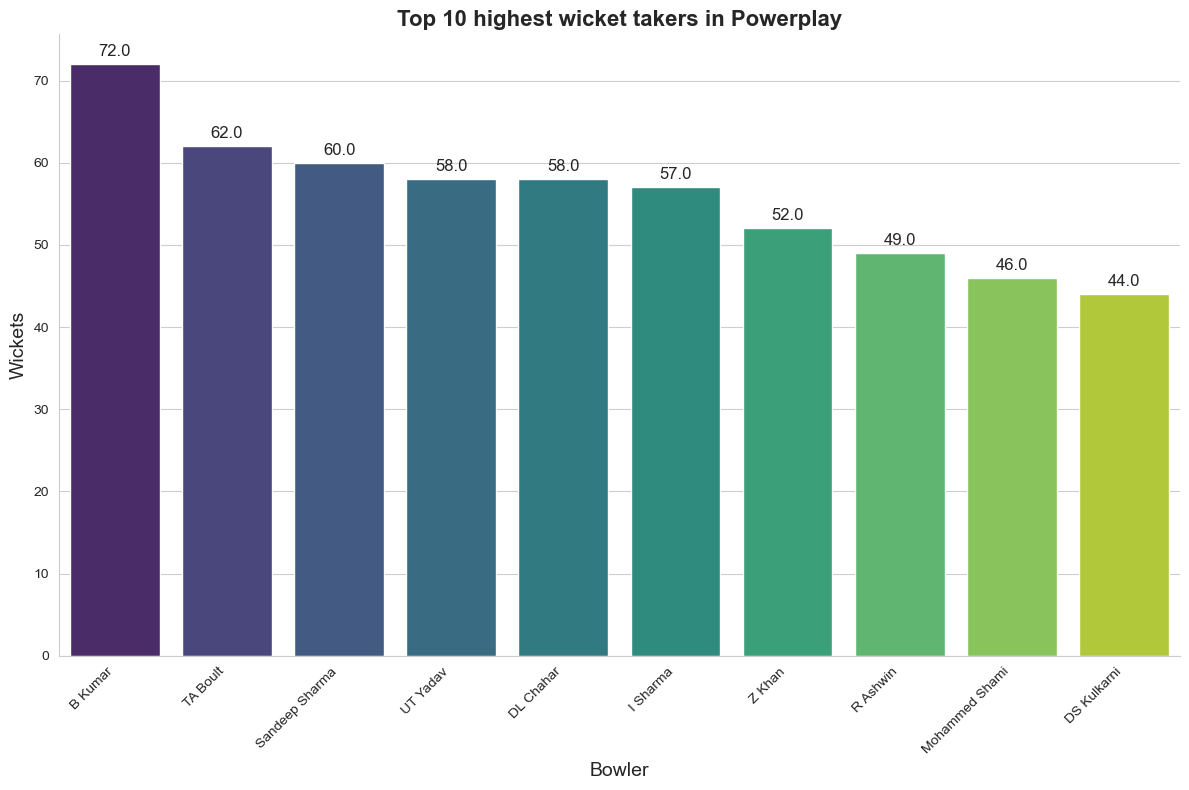

In [111]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='player_name', y='total_wickets', data=bowler_stats_pp.head(10), palette="viridis")

# Add a title and axis labels
plt.title('Top 10 highest wicket takers in Powerplay', fontsize=16, fontweight='bold')
plt.xlabel('Bowler', fontsize=14)
plt.ylabel('Wickets', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=12)

# Remove top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

In [112]:
pp_eco = bowler_stats_pp.head(15)
pp_eco = pp_eco.sort_values(by='economy',ascending=True)

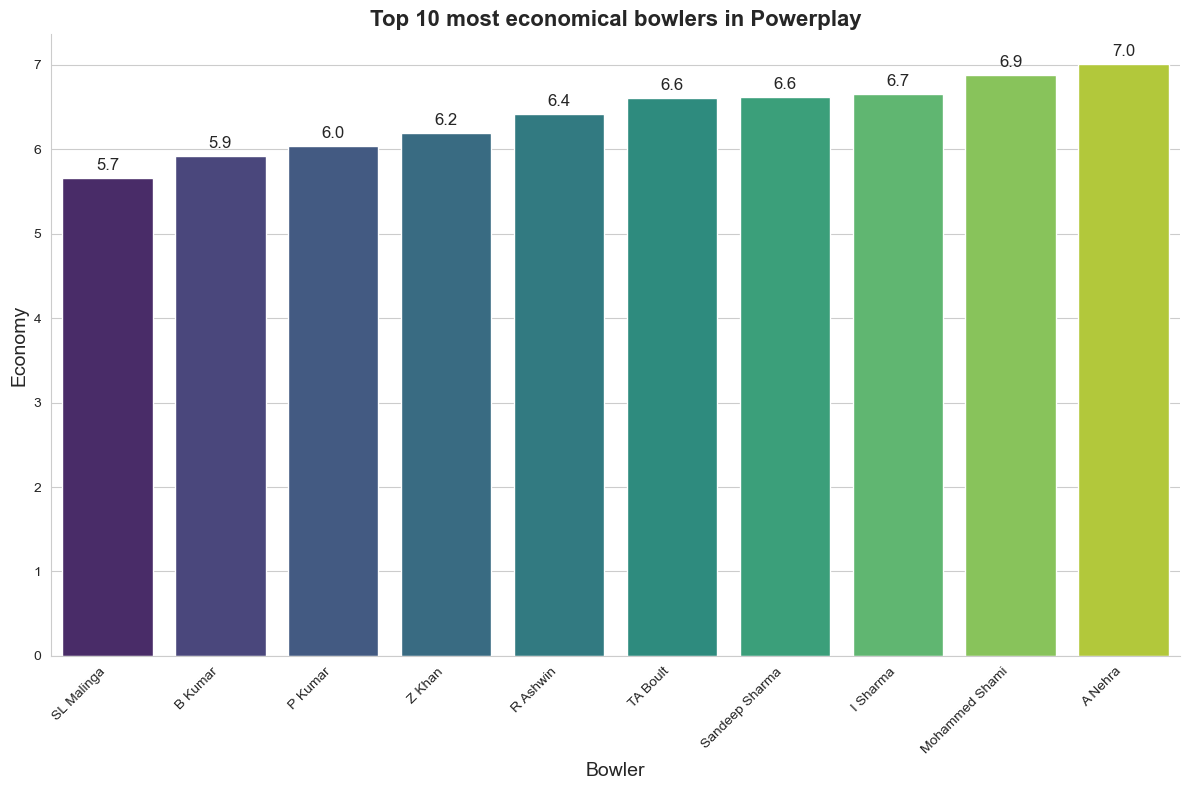

In [113]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='player_name', y='economy', data=pp_eco.head(10), palette="viridis")

# Add a title and axis labels
plt.title('Top 10 most economical bowlers in Powerplay', fontsize=16, fontweight='bold')
plt.xlabel('Bowler', fontsize=14)
plt.ylabel('Economy', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=12)

# Remove top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

In [114]:
bowler_dismissals = ['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped', 'hit wicket']
valid_wickets_df_mo = mo_overs_stats[(mo_overs_stats['is_wicket'] == 1) & 
                                       (mo_overs_stats['dismissal_kind'].isin(bowler_dismissals))]

In [115]:
bowler_wickets_mo = valid_wickets_df_mo.groupby('bowler').size().reset_index(name='total_wickets')

In [116]:
bowler_balls_matches_mo = mo_overs_stats.groupby('bowler').agg(
    total_balls=('ball', 'count'),
    total_runs_given =('runs_off_the_bat','sum'),
    total_matches=('match_id', 'nunique')
).reset_index()

In [117]:
bowler_stats_mo = bowler_wickets_mo.merge(bowler_balls_matches_mo, on='bowler')
bowler_stats_mo.rename(columns={'bowler': 'player_name'}, inplace=True)
bowler_stats_mo = bowler_stats_mo.sort_values(by = 'total_wickets', ascending= False).reset_index()
bowler_stats_mo = bowler_stats_mo.drop(columns = ['index'])
bowler_stats_mo['economy'] = (bowler_stats_mo['total_runs_given'] / (bowler_stats_mo['total_balls'] / 6)).round(2)

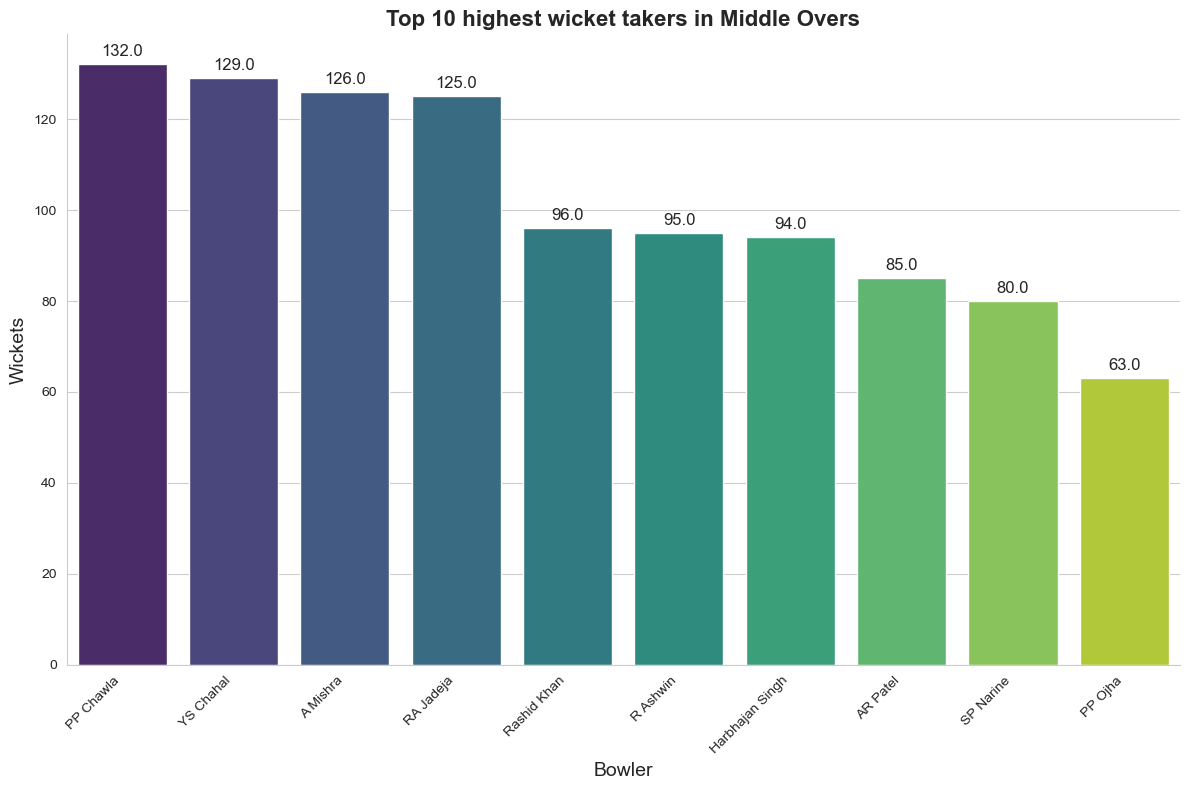

In [118]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='player_name', y='total_wickets', data=bowler_stats_mo.head(10), palette="viridis")

# Add a title and axis labels
plt.title('Top 10 highest wicket takers in Middle Overs', fontsize=16, fontweight='bold')
plt.xlabel('Bowler', fontsize=14)
plt.ylabel('Wickets', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=12)

# Remove top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

In [119]:
mo_eco = bowler_stats_mo.head(15)
mo_eco = mo_eco.sort_values(by='economy',ascending=True)

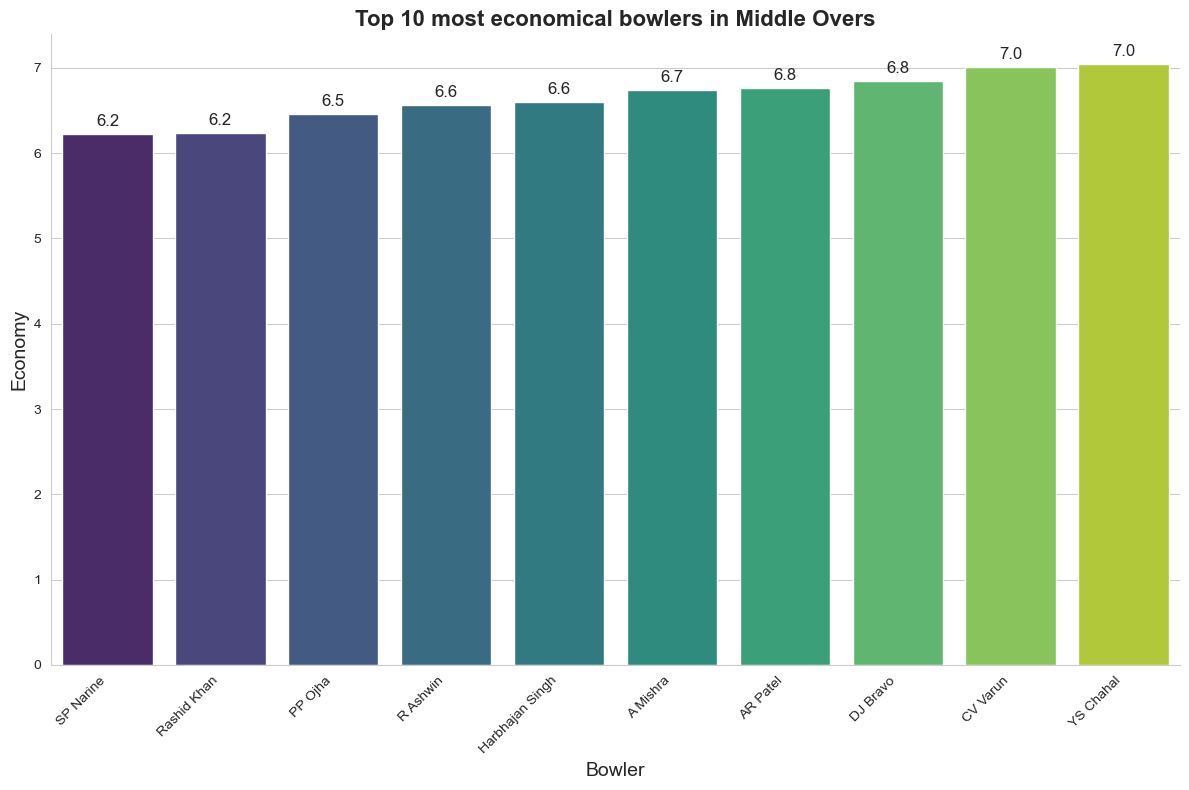

In [120]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='player_name', y='economy', data=mo_eco.head(10), palette="viridis")

# Add a title and axis labels
plt.title('Top 10 most economical bowlers in Middle Overs', fontsize=16, fontweight='bold')
plt.xlabel('Bowler', fontsize=14)
plt.ylabel('Economy', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=12)

# Remove top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

In [121]:
bowler_dismissals = ['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped', 'hit wicket']
valid_wickets_df_do = Death_overs_stats[(Death_overs_stats['is_wicket'] == 1) & 
                                       (Death_overs_stats['dismissal_kind'].isin(bowler_dismissals))]

In [122]:
bowler_wickets_do = valid_wickets_df_do.groupby('bowler').size().reset_index(name='total_wickets')

In [123]:
bowler_balls_matches_do = Death_overs_stats.groupby('bowler').agg(
    total_balls=('ball', 'count'),
    total_runs_given =('runs_off_the_bat','sum'),
    total_matches=('match_id', 'nunique')
).reset_index()

In [124]:
bowler_stats_do = bowler_wickets_do.merge(bowler_balls_matches_do, on='bowler')
bowler_stats_do.rename(columns={'bowler': 'player_name'}, inplace=True)
bowler_stats_do = bowler_stats_do.sort_values(by = 'total_wickets', ascending= False).reset_index()
bowler_stats_do = bowler_stats_do.drop(columns = ['index'])
bowler_stats_do['economy'] = (bowler_stats_do['total_runs_given'] / (bowler_stats_do['total_balls'] / 6)).round(2)

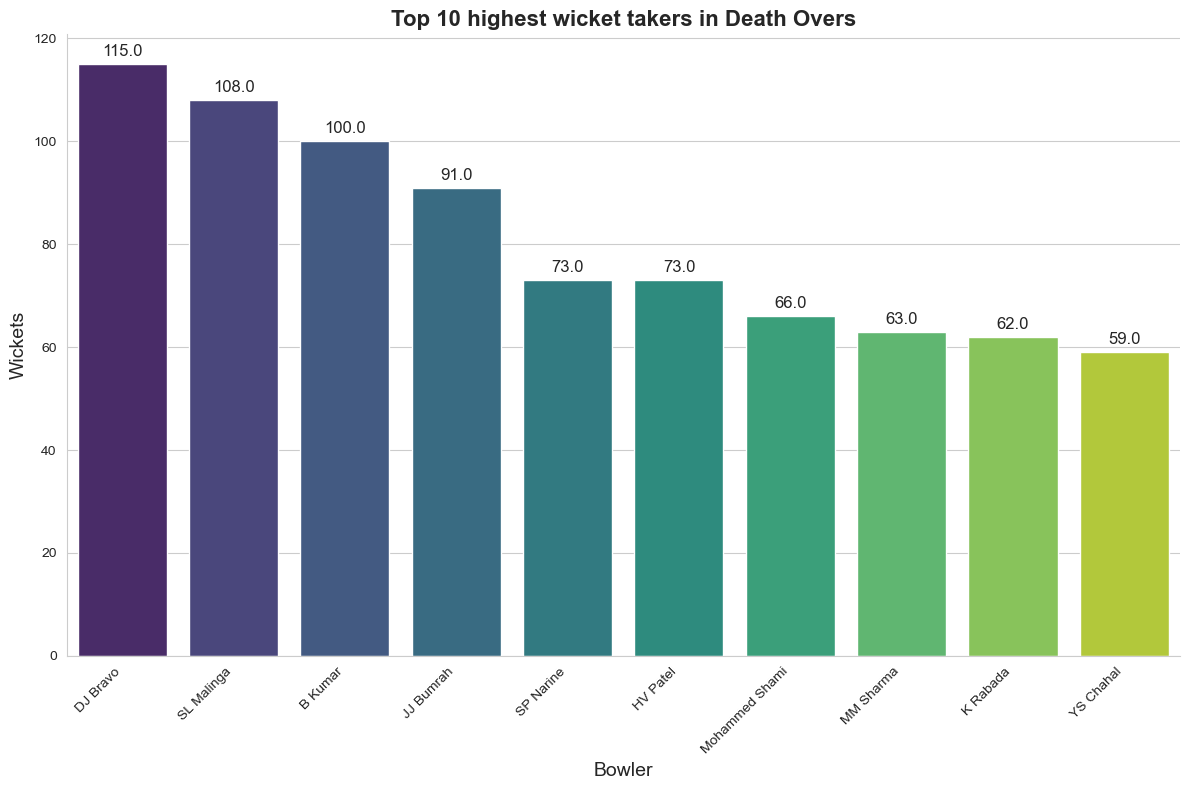

In [125]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='player_name', y='total_wickets', data=bowler_stats_do.head(10), palette="viridis")

# Add a title and axis labels
plt.title('Top 10 highest wicket takers in Death Overs', fontsize=16, fontweight='bold')
plt.xlabel('Bowler', fontsize=14)
plt.ylabel('Wickets', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=12)

# Remove top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

In [126]:
do_eco = bowler_stats_do.head(15)
do_eco = do_eco.sort_values(by='economy',ascending=True)

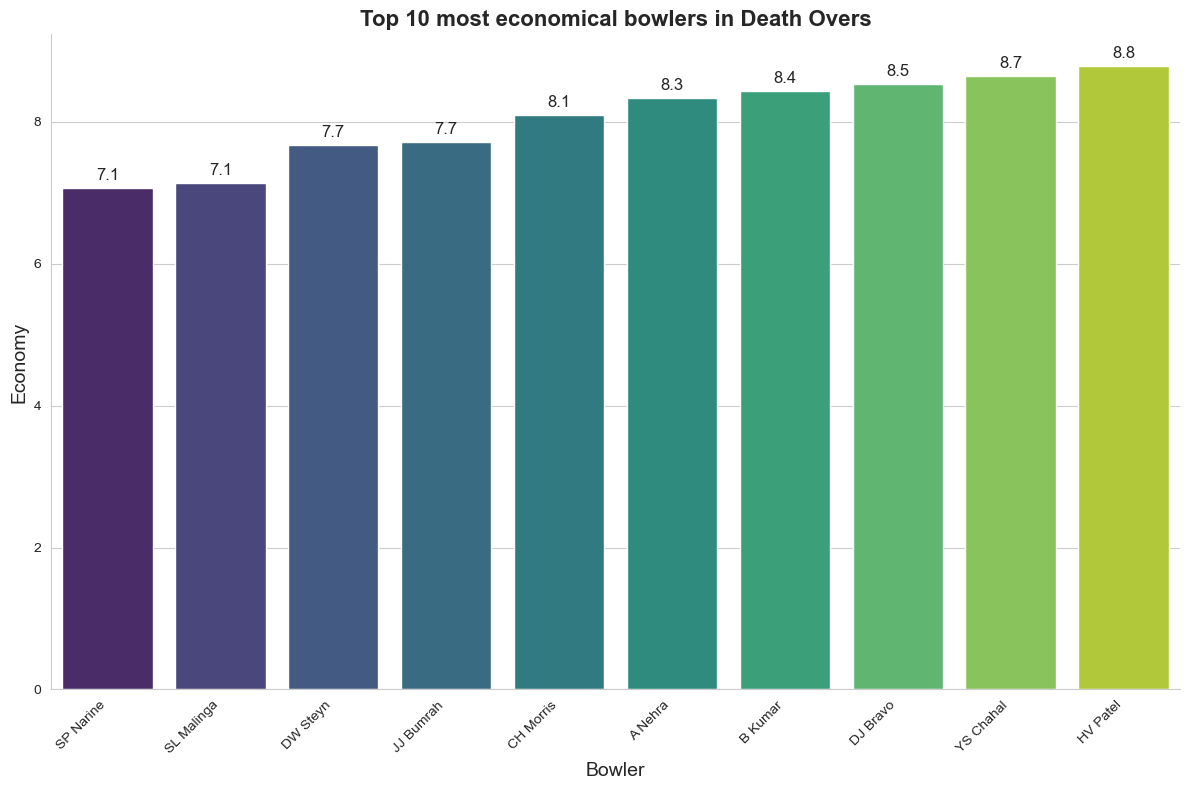

In [127]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='player_name', y='economy', data=do_eco.head(10), palette="viridis")

# Add a title and axis labels
plt.title('Top 10 most economical bowlers in Death Overs', fontsize=16, fontweight='bold')
plt.xlabel('Bowler', fontsize=14)
plt.ylabel('Economy', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=12)

# Remove top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

### We Need 4 Bowlers(8th,9th,10th,11th), Since Jadeja is already there so we need one more spinner and 3 Fast Bowlers
### For no.8 we need a Bowling ALL-Rounder who is a good bowler but can also be handy with the Bat,  And  Then 3 Pure Bowlers

In [128]:
Top_All_rounders

,player_name,total_runs,total_innings,average,strike rate,total_wickets,total_balls,total_runs_given,total_matches,economy
0,RA Jadeja,2959,180,16.438889,124.432296,160,3895,4777,211,7.36
1,AD Russell,2484,104,23.884615,164.285714,115,1771,2561,112,8.68
2,AR Patel,1653,112,14.758929,125.417299,123,3146,3701,148,7.06
3,DJ Bravo,1560,110,14.181818,125.100241,183,3296,4178,158,7.61
4,SP Narine,1534,106,14.471698,155.894309,180,4140,4481,175,6.49


### For No 8 The Best Options are:
#### 1. Dwayne Bravo (Highest Wicket Takers in the death overs and also the 8th best economical bowler in death over 
#### and also The 4th Best All Rounder of the IPL )

#### 2. Axar Patel (8th highest wicket taker in middle overs and 7th most economical bowler in middle overs
#### and also the third best all rounder of the IPL)

#### 3. Sunil Narine (Most economical bowler in both middle and Death overs and also the 4th highest wicket taker in 
#### death overs and 9th highest wicket taker in middle overs and also the 5th best all rounder of IPL)

### 8th Slot - DJ Bravo/ Sunil Narine/ Axar Patel (Bravo>Narine>Axar)

### For Selecting a Fast Bowler who is Power Play Specialist best option is Bhuvneshwar Kumar as he is the highest wicket taker
### in the powerplay and also has the second best economy in the powerplay adding to it he is the third highest wicket taker in death overs

### For Selecting a Fast Bowler who is a death bowler specialist the best options are:
#### 1. Lasith Malinga (Highest wicket taker in death overs and also the second best economical bowler in death overs)
#### 2. Jasprit Bumrah ( 4th highest wicket taker in death overs and also the best 4th most economical bowler in death overs)

### For selecting a one speciallist spinner, Best option is: 
#### 1. Yuzvendra Chahal (IPL highest wicket taker and 3rd highest wicket taker in middle overs and 6th most economical bowler in middle overs and also in the list of top 10 highest wicket takers in death overs)

### Now lets see positions which had multiple options :
#### 1. David Warner/KL Rahul
#### 4. AB Devillers/ Sanju Samson
#### 8. DJ Bravo/Sunil Narine/ Axar Patel
#### Since there is only one overseas option locked in till now and 3 overseas slots left so we gonna pick David Warner, AB Devillers and DJ Bravo

### SO According To The IPL Ball By Ball Data, All time IPL XI is:
###  1. David Warner
###  2. Virat Kohli
###  3. Suresh Raina
###  4. AB DeVillers
###  5. MS Dhoni (c)(wk)
###  6. Andre Russell
###  7. Ravindra Jadeja
###  8. DJ Bravo
###  9. Bhuvneshwar Kumar
### 10. Jasprit Bumrah
### 11. Yuzvendra Chahal